from 3: Fit a linear regression of travel distance vs. extra
cost (the cost above the base fare) on the data from Day 1 to Day 10 of September, and see how the fitted
line predicts the fares for data from Day 11 to Day 17? What is the error in prediction?

Analysis 4. Both length and duration of a trip seem to have an association with extra fares. Longer trips are more expensive. Do the same analysis in (3), but for travel duration vs. extra cost, and identify whether trip length or trip duration seem to be a better predictor of the extra travel fare?

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

### Filter data

In [2]:
taxi = Table().read_table("SF_taxi_data.csv")
refined_data = taxi.where("num", 1).where("fare ($)", are.above(3.5))
refined_data

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,9/1/12 0:11,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,9/1/12 0:23,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,9/1/12 0:45,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,9/1/12 1:09,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,9/1/12 1:40,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,9/1/12 2:49,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
7,9/1/12 3:29,9/1/12 3:47,43.65,1,-122.403,37.7927,-122.386,37.6181,2,239,14.5105
8,9/1/12 0:33,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
9,9/1/12 4:39,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,9/1/12 1:59,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807


In [3]:
def parse_prefix(line, fmt):
    try:
        t = datetime.strptime(line, fmt)
    except ValueError as v:
        if len(v.args) > 0 and v.args[0].startswith('unconverted data remains: '):
            line = line[:-(len(v.args[0]) - 26)]
            t = datetime.strptime(line, fmt)
        else:
            raise
    return t

In [4]:
taxi_unrefined = Table().read_table("SF_taxi_data.csv")
taxi = taxi_unrefined.where('num', 1).where('fare ($)', are.above(3.5))
taxi['arrival time'] = taxi.select(2).apply(lambda x: parse_prefix(x[0],"%m/%d/%y %H:%M"))
taxi['departure time'] = taxi.select(1).apply(lambda x: parse_prefix(x[0],"%m/%d/%y %H:%M"))
taxi_a = taxi.where(list(map(lambda x: x.day >= 1 and x.day <=10, taxi[2])))

taxi_filtered = refined_data.where('id', are.contained_in(taxi_a.column('id')))
taxi_filtered

id,departure time,arrival time,fare ($),num,dep lon,dep lat,arr lon,arr lat,deptaz,arrtaz,dist (miles)
0,9/1/12 0:11,9/1/12 0:20,13.2,1,-122.414,37.8027,-122.421,37.7854,38,30,1.98084
1,9/1/12 0:23,9/1/12 0:31,10.65,1,-122.42,37.7861,-122.435,37.7622,30,94,2.40224
2,9/1/12 0:45,9/1/12 0:49,9,1,-122.415,37.7747,-122.408,37.7826,10,11,0.479348
4,9/1/12 1:09,9/1/12 1:13,7.35,1,-122.43,37.7978,-122.418,37.789,45,32,1.03807
5,9/1/12 1:40,9/1/12 1:52,11.75,1,-122.433,37.7841,-122.411,37.787,77,7,0.960851
6,9/1/12 2:49,9/1/12 2:51,5.15,1,-122.409,37.7856,-122.412,37.791,7,29,0.414315
7,9/1/12 3:29,9/1/12 3:47,43.65,1,-122.403,37.7927,-122.386,37.6181,2,239,14.5105
8,9/1/12 0:33,9/1/12 0:57,46.75,1,-122.387,37.6174,-122.407,37.7889,239,5,14.2747
9,9/1/12 4:39,9/1/12 4:43,6.25,1,-122.422,37.7977,-122.418,37.789,34,31,0.685312
10,9/1/12 1:59,9/1/12 2:05,9.55,1,-122.418,37.791,-122.429,37.7724,32,81,1.59807


### Calculate extra cost and duration 

In [5]:

import datetime
def get_dur(start,finish): 
    start_time = datetime.datetime.strptime(start, "%m/%d/%y %H:%M")
    end_time = datetime.datetime.strptime(finish, "%m/%d/%y %H:%M")
    return (end_time-start_time).seconds/60.
duration = make_array()

for i in np.arange(taxi_filtered.num_rows):
    durations = get_dur(taxi_filtered.column('departure time').item(i), taxi_filtered.column('arrival time').item(i))
    duration = np.append(duration, durations)

base_fare = 3.5 + 0.55 * (5*(taxi_filtered.column('dist (miles)')) - 1)
taxi_extracost = taxi_filtered.with_column('extra cost', taxi_filtered['fare ($)'] - base_fare, 'duration', duration)
taxi_train = taxi_extracost.select('duration', 'extra cost')
taxi_train


duration,extra cost
9,4.8027
8,1.09384
4,4.73179
4,1.54531
12,6.15766
2,1.06063
18,0.796
24,4.5446
4,1.41539
6,2.20531


### Plot extra cost vs. duration

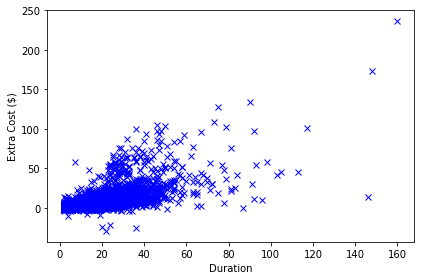

In [6]:
plt.plot(taxi_train[0], taxi_train[1], 'bx')
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.xlabel("Duration")
plt.ylabel("Extra Cost ($)")
plt.tight_layout()
plt.savefig("scatter.pdf")

### Estimate parameters

In [7]:
x = taxi_train["duration"]
y = taxi_train["extra cost"]
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(0.49118878021181195, -1.2957817827963707)

### Plot linear regression

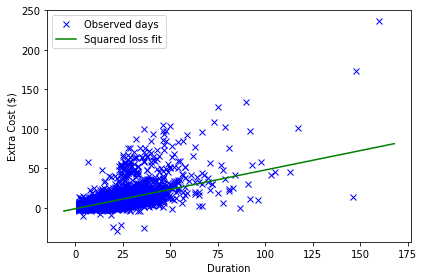

In [8]:
plt.plot(taxi_train["duration"], taxi_train["extra cost"], "bx",
         xlim, [theta1*xlim[0]+theta2, theta1*xlim[1]+theta2], 'g-')
plt.ylim(ylim)
plt.legend(["Observed days", "Squared loss fit"], loc="upper left")
plt.xlabel("Duration")
plt.ylabel("Extra Cost ($)")
plt.tight_layout()
plt.savefig("fit.pdf")

### Prediction of extra cost by duration using linear regressor

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

taxi_b = taxi.where(list(map(lambda x: x.day >= 11 and x.day <=17, taxi[2])))
taxi_test = refined_data.where('id', are.contained_in(taxi_b.column('id')))
duration_test = make_array()
for i in np.arange(taxi_test.num_rows):
    durations = get_dur(taxi_test.column('departure time').item(i), taxi_test.column('arrival time').item(i))
    duration_test = np.append(duration_test, durations)
base_fare = 3.5 + 0.55 * (5*(taxi_test.column('dist (miles)')) - 1)
taxitest_final = Table().with_column('extra cost', taxi_test['fare ($)'] - base_fare, 'duration', duration_test)
taxitest_final = taxitest_final.select('duration', 'extra cost')

Coefficients: 
 [[ 0.49118878]]
Mean squared error: 19.88
Variance score (r-square): 0.44


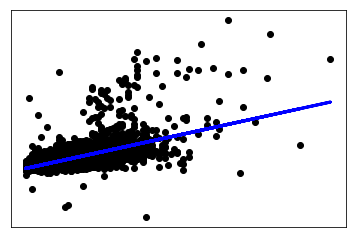

In [10]:
# Define regressor
regr = linear_model.LinearRegression()

# Set a train data
X_train = np.reshape(taxi_train["duration"], (len(taxi_train["duration"]),1))
y_train = np.reshape(taxi_train["extra cost"], (len(taxi_train["extra cost"]),1))

# Set a test data
X_test = np.reshape(taxitest_final["duration"], (len(taxitest_final['duration']),1))
y_test = np.reshape(taxitest_final["extra cost"], (len(taxitest_final["extra cost"]),1))

# Train the linear regressor with the train data
regr.fit(X_train,y_train)

# Mkae predictions using the test set
load_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, load_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score (r-square): %.2f' % r2_score(y_test, load_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, load_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()